In [40]:
%matplotlib inline
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt
import datetime as dt
from werkzeug.wrappers import Request, Response

In [41]:
import numpy as np
import pandas as pd

In [42]:
import datetime as dt

In [43]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [44]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [45]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [46]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [48]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [49]:
#To access the station data I looked on my terminal for the token and pasted it into the input box. 
date_prcp_query = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >='2016-08-23', Measurement.date <='2017-08-23').\
order_by(Measurement.date).statement

In [50]:
#date_prcp_df = pd.read_sql(date_prcp_query, engine, index_col='date').dropna()
date_prcp_df = pd.read_sql(date_prcp_query, engine).dropna()
date_prcp_df.head(5)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


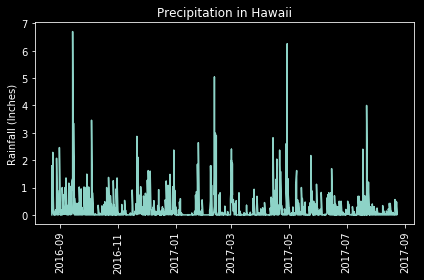

In [51]:
date_prcp_df['date']  = pd.to_datetime(date_prcp_df['date'])
plt.plot(date_prcp_df['date'], date_prcp_df['prcp'])
plt.title("Precipitation in Hawaii")
plt.xlabel('')
plt.ylabel('Rainfall (Inches)')
plt.xticks(rotation='90')
plt.tight_layout()
plt.show()

In [52]:
date_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [53]:
#Let's do this for both the Measurements and stations dataset and compare that the two give the same answer.  

station_boolean = session.query(Measurement.station).distinct().count()== session.query(Station.station).distinct().count()
if station_boolean:
    num_station = session.query(Measurement.station).distinct().count()
    print(f'The number of stations = {num_station}')
else:
    print('your database is not NSYNC')

The number of stations = 9


In [54]:
desc_observ = engine.execute('select station, count(station) from measurement group by station order by count(station) desc').fetchall()
desc_observ

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
station_id = desc_observ[0][0]
station_name = session.query(Station.name).filter(Station.station==desc_observ[0][0]).all()
print(f'The highest number of observations come from {station_name[0][0]}')


The highest number of observations come from WAIHEE 837.5, HI US


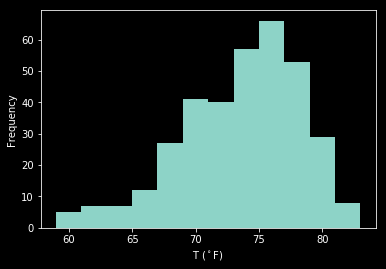

In [56]:
tobs_query = session.query(Measurement.tobs, Measurement.station).\
filter(Measurement.date >='2016-08-23', Measurement.date <='2017-08-23').\
filter(Measurement.station==station_id).\
order_by(Measurement.date).statement 

tobs_df = pd.read_sql(tobs_query, engine).dropna()
tobs_df.head(5)

x = tobs_df['tobs']

plt.hist(x, bins=12)
plt.xlabel(r'T ($^\circ$F)')
plt.ylabel('Frequency')
plt.show()